Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [2]:
#import pydicom
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

Loading the data

In [3]:
X = np.load('/content/drive/My Drive/Datasets/breaKHis/2class_all_data/x_train.npy')
y = np.load('/content/drive/My Drive/Datasets/breaKHis/2class_all_data/y_train.npy')

In [ ]:
print(X.shape)
print(y.shape)
print(np.unique(y))

(5536, 224, 224, 3)
(5536,)
[0. 1.]


Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [4]:
!pip install keras-multi-head
from keras_multi_head import MultiHead

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-multi-head: filename=keras_multi_head-0.29.0-py3-none-any.whl size=14974 sha256=27cfd45e26bab532bc91b69812fea1347069095183b309786888bae4c6ecad7b
  Stored in directory: /root/.cache/pip/wheels/cb/23/4b/06d7ae21714f70fcc25b48f972cc8e5e7f4b6b764a038b509d
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=68f0564a9a3677fffb20c76290a8529d75a6fc82d97cb31da5188c50227e5177
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-multi-head keras-self-attention


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_1 (Conv2D)         │ (None, 224, 224, 32)   │            896 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_60          │ (None, 112, 112, 32)   │              0 │ Conv2D_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-1 (MultiHead)  │ (None, 112, 112, 32,   │         35,936 │ max_pooling2d_60[0][0] │
│                           │ 3)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_1 (Conv3D)         │ (None, 112, 112, 32,   │              4 │ Multi-Head-1[0][0]     │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_60         │ (None, 112, 112, 32)   │              0 │ Conv3D_1[0][0],        │
│ (MultiHeadADD)            │                        │                │ max_pooling2d_60[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_2 (Conv2D)         │ (None, 112, 112, 32)   │          9,248 │ multi_head_add_60[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_61          │ (None, 56, 56, 32)     │              0 │ Conv2D_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-2 (MultiHead)  │ (None, 56, 56, 32, 3)  │         35,936 │ max_pooling2d_61[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_2 (Conv3D)         │ (None, 56, 56, 32, 1)  │              4 │ Multi-Head-2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_61         │ (None, 56, 56, 32)     │              0 │ Conv3D_2[0][0],        │
│ (MultiHeadADD)            │                        │                │ max_pooling2d_61[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_3 (Conv2D)         │ (None, 56, 56, 32)     │          9,248 │ multi_head_add_61[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_62          │ (None, 28, 28, 32)     │              0 │ Conv2D_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-3 (MultiHead)  │ (None, 28, 28, 32, 3)  │         35,936 │ max_pooling2d_62[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_3 (Conv3D)         │ (None, 28, 28, 32, 1)  │              4 │ Multi-Head-3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_62         │ (None, 28, 28, 32)     │              0 │ Conv3D_3[0][0],        │
│ (MultiHeadADD)       

 Total params: 226,550 (884.96 KB)

 Trainable params: 226,550 (884.96 KB)

 Non-trainable params: 0 (0.00 B)

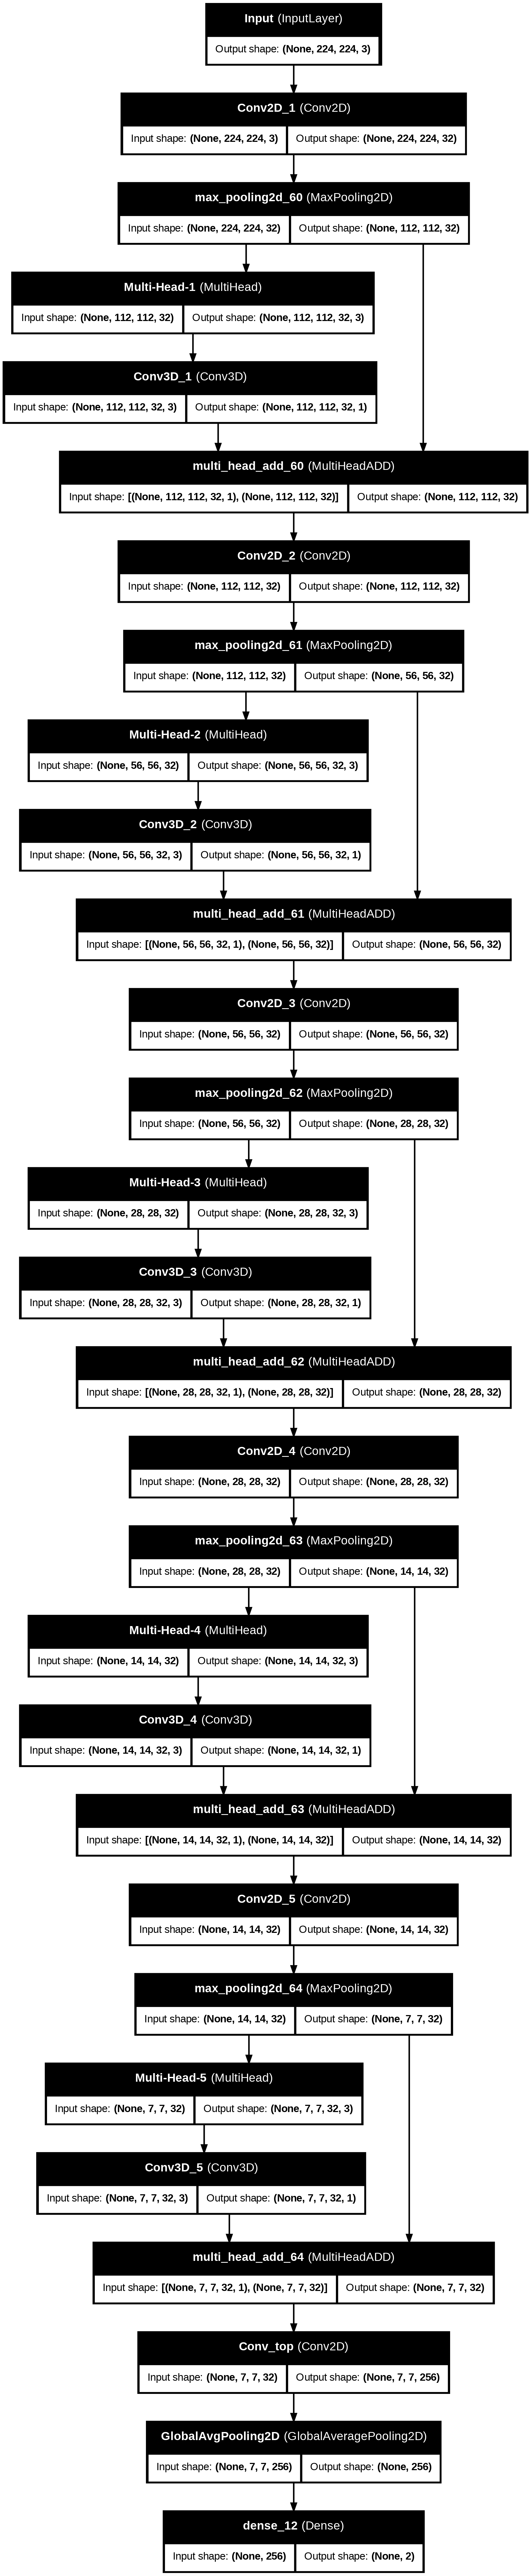

In [73]:
class MultiHeadADD(tf.keras.layers.Layer):
  def call(self, x, y):
    return tf.squeeze(x, axis=-1) + y

IMAGE_SIZE = (224, 224, 3)
input_layer = tf.keras.Input(shape = IMAGE_SIZE, name = "Input")
#contrast_layer = tf.keras.layers.Lambda(lambda x: tf.image.central_crop(x, 0.75))(input_layer)
conv_layer_1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_1')(input_layer)
pooling_layer_1 = tf.keras.layers.MaxPooling2D(2, 2)(conv_layer_1)
att_layer_1 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),], name='Multi-Head-1')(pooling_layer_1)
att_add_layer_1 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_1')(att_layer_1)
add_layer_1 = MultiHeadADD()(att_add_layer_1, pooling_layer_1)
conv_layer_2 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_2')(add_layer_1)
pooling_layer_2 = tf.keras.layers.MaxPooling2D(2, 2)(conv_layer_2)
att_layer_2 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),], name='Multi-Head-2')(pooling_layer_2)
att_add_layer_2 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_2')(att_layer_2)
add_layer_2 = MultiHeadADD()(att_add_layer_2, pooling_layer_2)
conv_layer_3 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_3')(add_layer_2)
pooling_layer_3 = tf.keras.layers.MaxPooling2D(2, 2)(conv_layer_3)
att_layer_3 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),], name='Multi-Head-3')(pooling_layer_3)
att_add_layer_3 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_3')(att_layer_3)
add_layer_3 = MultiHeadADD()(att_add_layer_3, pooling_layer_3)
conv_layer_4 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_4')(add_layer_3)
pooling_layer_4 = tf.keras.layers.MaxPooling2D(2, 2)(conv_layer_4)
att_layer_4 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),], name='Multi-Head-4')(pooling_layer_4)
att_add_layer_4 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_4')(att_layer_4)
add_layer_4 = MultiHeadADD()(att_add_layer_4, pooling_layer_4)
conv_layer_5 = tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_5')(add_layer_4)
pooling_layer_5 = tf.keras.layers.MaxPooling2D(2, 2)(conv_layer_5)
att_layer_5 = MultiHead([
    tf.keras.layers.Conv2D(filters=32, kernel_size=1, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation = 'gelu', padding='same'),], name='Multi-Head-5')(pooling_layer_5)
att_add_layer_5 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_5')(att_layer_5)
add_layer_5 = MultiHeadADD()(att_add_layer_5, pooling_layer_5)
conv_layer_6 = tf.keras.layers.Conv2D(filters = 256, kernel_size=1, activation = 'gelu', padding='same', name='Conv_top')(add_layer_5)
pooling_layer_6 = tf.keras.layers.GlobalAveragePooling2D(name = 'GlobalAvgPooling2D')(conv_layer_6)
prediction_layer = tf.keras.layers.Dense(units = 2, activation = 'softmax')(pooling_layer_6)
model = tf.keras.Model(inputs = input_layer, outputs = prediction_layer)
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [75]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 1.0), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [76]:
model.fit(X, y, batch_size = 16, epochs = 30)

Epoch 1/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.7445 - loss: 0.5440
Epoch 2/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8516 - loss: 0.4003
Epoch 3/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8503 - loss: 0.3972
Epoch 4/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8611 - loss: 0.3737
Epoch 5/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8690 - loss: 0.3612
Epoch 6/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8799 - loss: 0.3315
Epoch 7/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8718 - loss: 0.3365
Epoch 8/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8843 - loss: 0.3075
Epoch 9/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8907 - loss: 0.2791
Epoch 10/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8979 - loss: 0.2627
Epoch 11/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8992 - loss: 0.2490
Epoch 12/30
346/346 ━━━━━━━━━━━━━━━━━━━

In [8]:
X_test = np.load('/content/drive/My Drive/Datasets/breaKHis/2class_all_data/x_test.npy')
y_test = np.load('/content/drive/My Drive/Datasets/breaKHis/2class_all_data/y_test.npy')

In [77]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis = 1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


In [10]:
import sklearn
#!pip install visualkeras
#import visualkeras

In [ ]:
visualkeras.layered_view(model, legend=True)

In [78]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_pred)}')

if 0:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_prob, average = 'weighted', multi_class='ovr')
else:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_pred)
print(f'AUC is {AUC}')

target_names = ['Benign', 'Malignant']

print('F1-score', sklearn.metrics.f1_score(y_test, y_pred, average = 'weighted'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_pred)}')
#print('Average-precision-score', sklearn.metrics.average_precision_score(y_test, y_prob, average = 'weighted'))
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_pred)}')
print(f'{sklearn.metrics.classification_report(y_test, y_pred, target_names=target_names)}')
#print(f'{sklearn.metrics.precision_recall_fscore_support(y_test, y_prob)}')

Accuracy 0.966708807416772
AUC is 0.9606715660274828
F1-score 0.9666683304411865
Balanced accuracy 0.9606715660274829
MCC 0.9235863085383065
              precision    recall  f1-score   support

      Benign       0.95      0.94      0.95       764
   Malignant       0.97      0.98      0.98      1609

    accuracy                           0.97      2373
   macro avg       0.96      0.96      0.96      2373
weighted avg       0.97      0.97      0.97      2373



[[0.94371728 0.05628272]
 [0.02237415 0.97762585]]


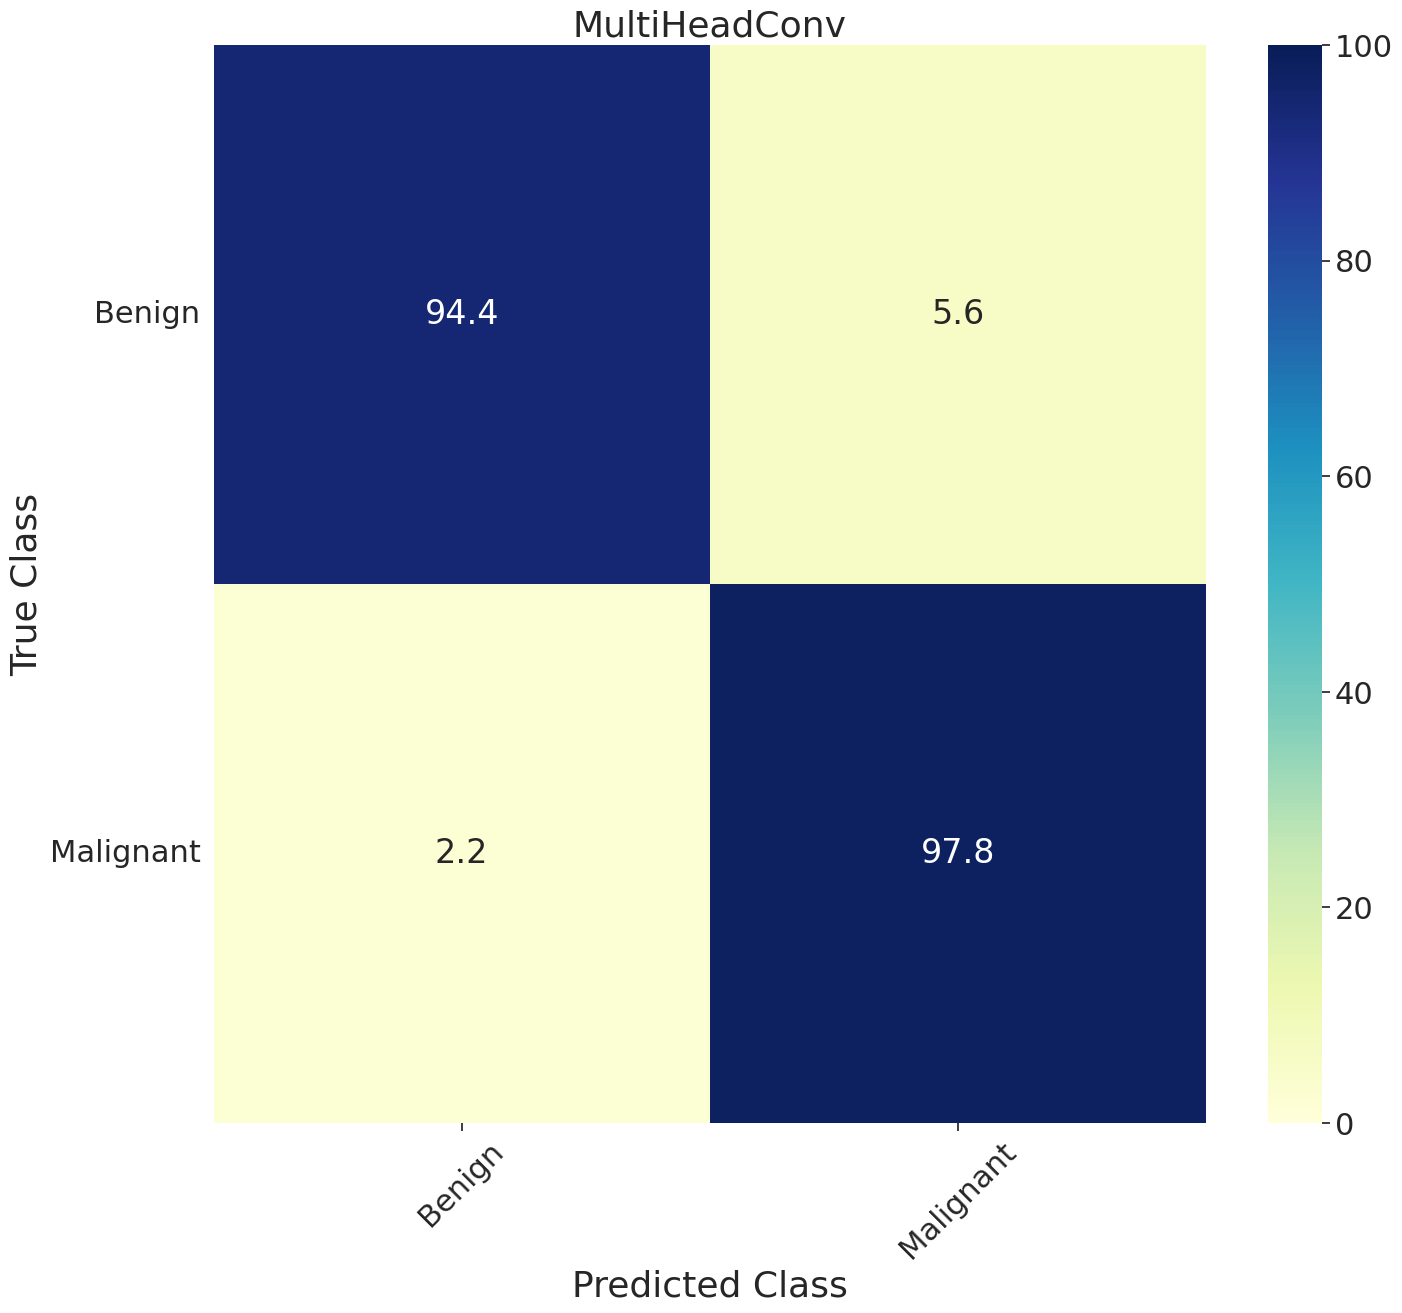

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred, normalize = 'true')

if 1:
  class_names = ['Benign', 'Malignant']
else:
  class_names = ['Bad', 'Good']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
if 1:
  fig = plt.figure(figsize=(16, 14))
else:
  fig = plt.figure(figsize = (8,6))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.1f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=26)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 22)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=26)
ax.yaxis.set_ticklabels(class_names, fontsize = 22)
plt.yticks(rotation=0)

plt.title('MultiHeadConv', fontsize=26)

plt.show()

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Making the HeatMap for GradCAM

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output] # Customized for EffNetV2
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Saving and Displaying the GradCAM

In [ ]:
def save_and_display_gradcam(img, heatmap, alpha):

    cam_path="cam.jpg"
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

label: 0.0


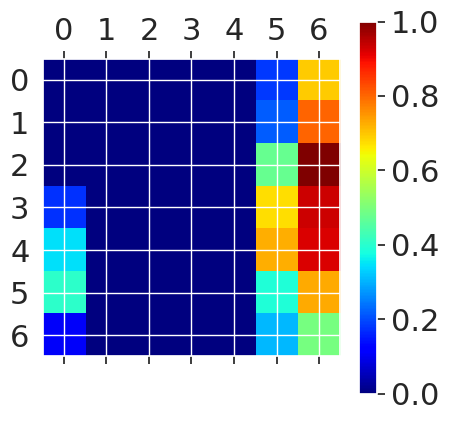

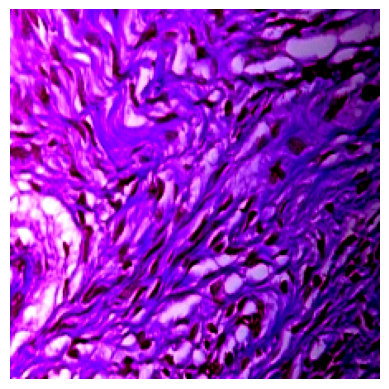

<ipython-input-18-a9759b55c360>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


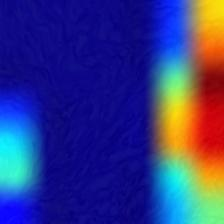

In [ ]:
# 55 for label 0, 556 for label 1
index = 118
img_array = np.expand_dims(X_test[index, :, :, :], axis = 0)
print('label:', y_test[index])

# Generate class activation heatmap

heatmap = make_gradcam_heatmap(img_array, model, 'conv_top')

# Display heatmap
plt.matshow(heatmap, cmap = 'jet')
plt.colorbar()
plt.show()

# Display original image
plt.imshow(np.squeeze(img_array))
plt.axis('off')
plt.show()

save_and_display_gradcam(np.squeeze(img_array), heatmap, alpha = 0.1)